# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#units = "Imperial"

# Build partial query URL
#query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bataipora
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | zhangatas
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | bingol
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kalanwali
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | baoshan
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | chiredzi
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | agapovka
Proces

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)           
# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bataipora,-22.2953,-53.2711,87.12,48,100,10.20,BR,1712930718
1,port alfred,-33.5906,26.8910,67.17,67,25,5.99,ZA,1712930718
2,st. john's,47.5649,-52.7093,45.28,64,100,27.63,CA,1712930439
3,grytviken,-54.2811,-36.5092,36.25,93,99,15.30,GS,1712930719
4,zhangatas,43.5667,69.7500,55.96,49,100,17.58,KZ,1712930719


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/weather_cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/weather_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bataipora,-22.2953,-53.2711,87.12,48,100,10.20,BR,1712930718
1,port alfred,-33.5906,26.8910,67.17,67,25,5.99,ZA,1712930718
2,st. john's,47.5649,-52.7093,45.28,64,100,27.63,CA,1712930439
3,grytviken,-54.2811,-36.5092,36.25,93,99,15.30,GS,1712930719
4,zhangatas,43.5667,69.7500,55.96,49,100,17.58,KZ,1712930719


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

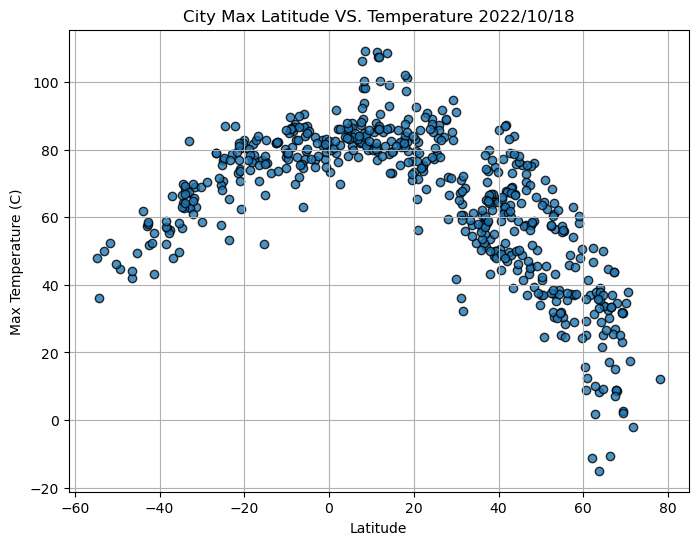

In [53]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude VS. Temperature 2022/10/18")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig1.png", bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

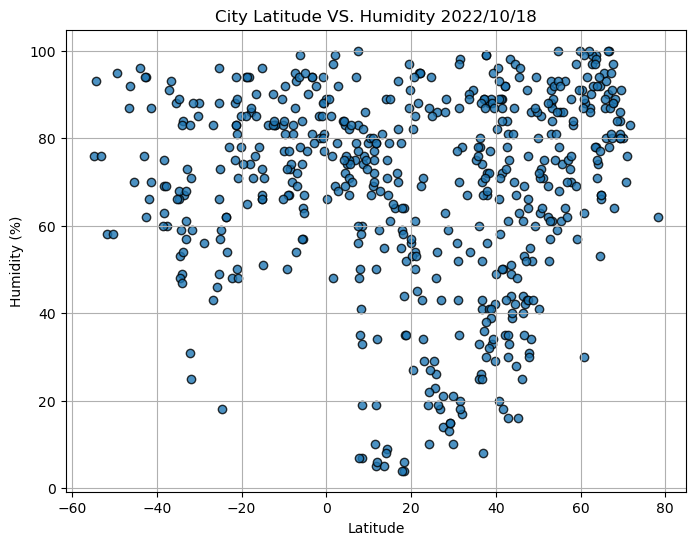

In [54]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude VS. Humidity 2022/10/18")
plt.grid()

# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig2.png", bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

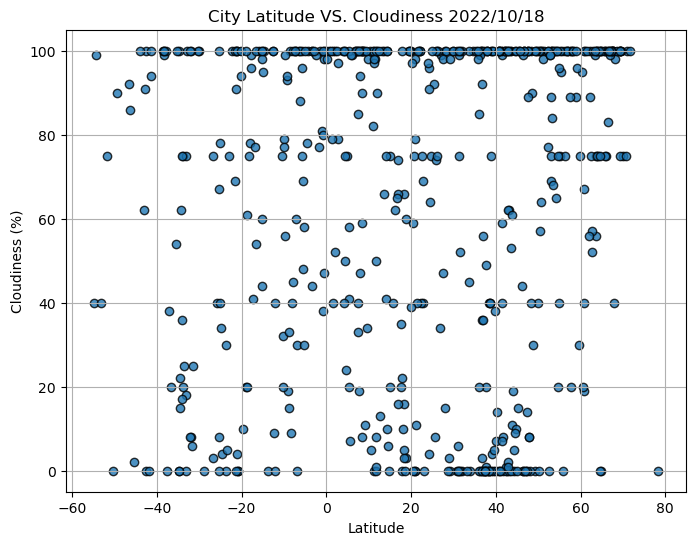

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude VS. Cloudiness 2022/10/18")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

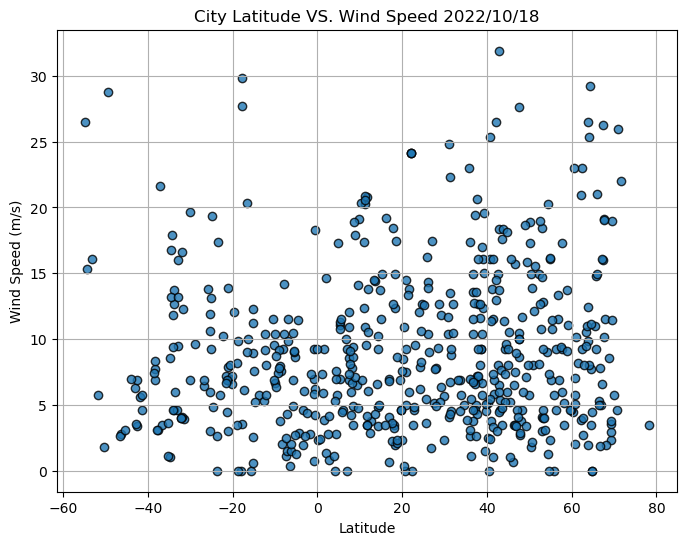

In [56]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude VS. Wind Speed 2022/10/18")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x_values,y_values)
    reg_values= x_values*slope + intercept
    plt.plot(x_values,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"C:/Users/willy/OneDrive/Documentos/GitHub/python_api_challenge_2024/output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

# YOUR CODE HERE

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,st. john's,47.5649,-52.7093,45.28,64,100,27.63,CA,1712930439
4,zhangatas,43.5667,69.7500,55.96,49,100,17.58,KZ,1712930719
5,petropavlovsk-kamchatsky,53.0452,158.6483,30.45,93,75,3.00,RU,1712930720
6,iqaluit,63.7506,-68.5145,8.33,78,75,26.46,CA,1712930720
7,bingol,38.8847,40.4939,64.92,39,75,10.36,TR,1712930721


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bataipora,-22.2953,-53.2711,87.12,48,100,10.20,BR,1712930718
1,port alfred,-33.5906,26.8910,67.17,67,25,5.99,ZA,1712930718
3,grytviken,-54.2811,-36.5092,36.25,93,99,15.30,GS,1712930719
9,port-aux-francais,-49.3500,70.2167,44.78,95,90,28.74,TF,1712930721
10,invercargill,-46.4000,168.3500,42.03,92,86,2.77,NZ,1712930722


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -1.0x + 98.36
The r-value is: -0.8368831326306164


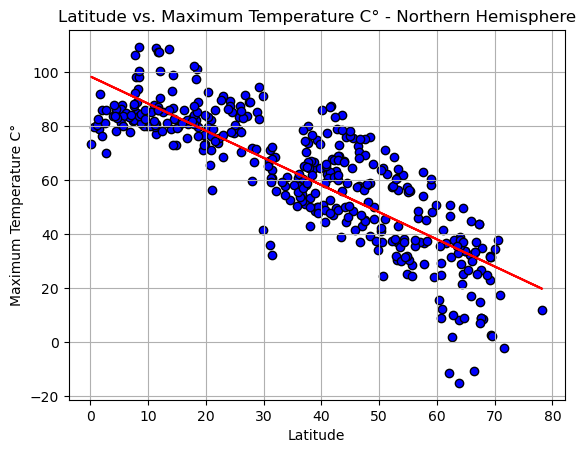

In [51]:
# Linear regression on Northern Hemisphere
plt.grid()
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()

# YOUR CODE HERE

Linear equation: y = 0.7x + 86.67
The r-value is: 0.8188323460068989


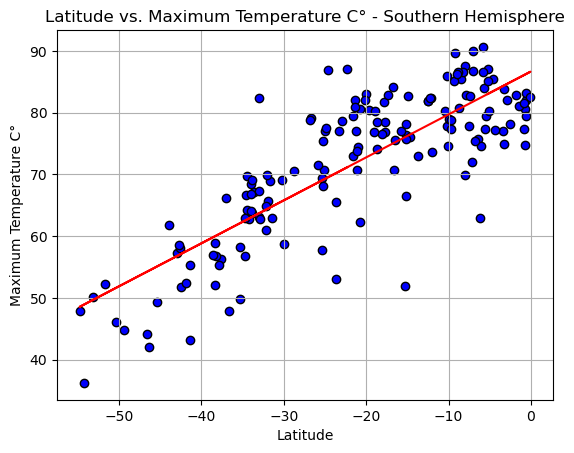

In [57]:
# Linear regression on Southern Hemisphere
plt.grid()
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.32x + 54.24
The r-value is: 0.2542885862026162


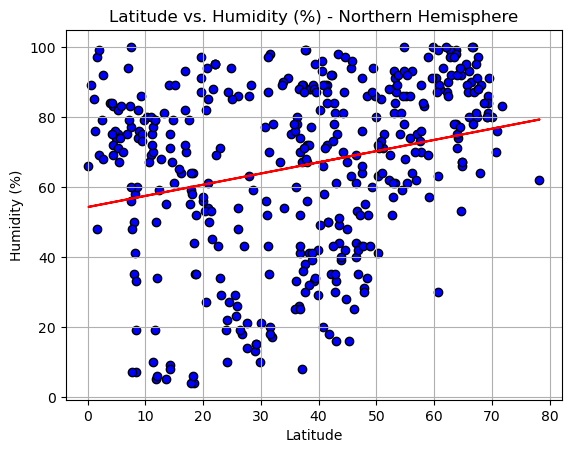

In [58]:
# Northern Hemisphere
plt.grid()
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()
# YOUR CODE HERE

Linear equation: y = 0.22x + 79.36
The r-value is: 0.20196582252453188


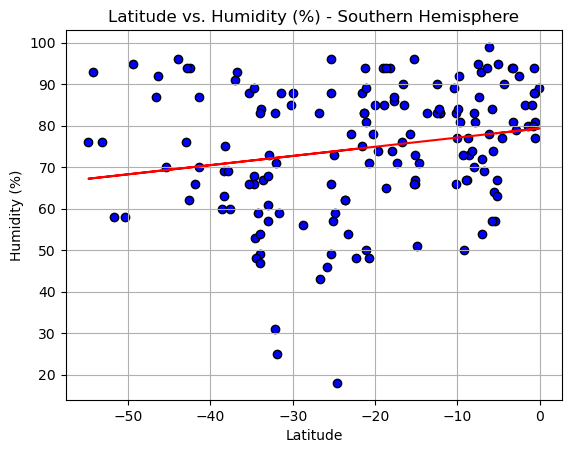

In [59]:
# Southern Hemisphere
plt.grid()
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.22x + 55.68
The r-value is: 0.10944489537537509


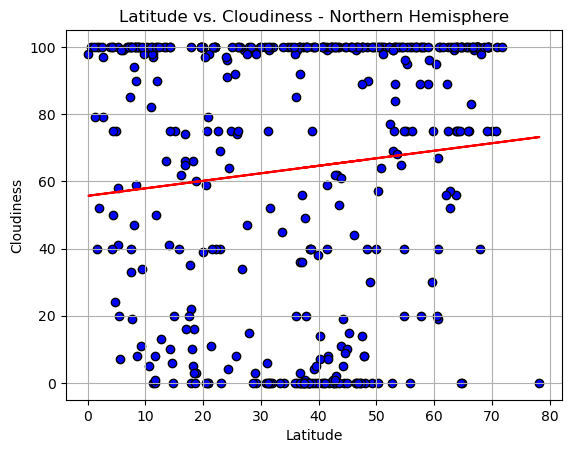

In [60]:
# Northern Hemisphere
plt.grid()
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness'
hemi = 'Northern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()
# YOUR CODE HERE

Linear equation: y = 0.48x + 71.98
The r-value is: 0.17977518066162296


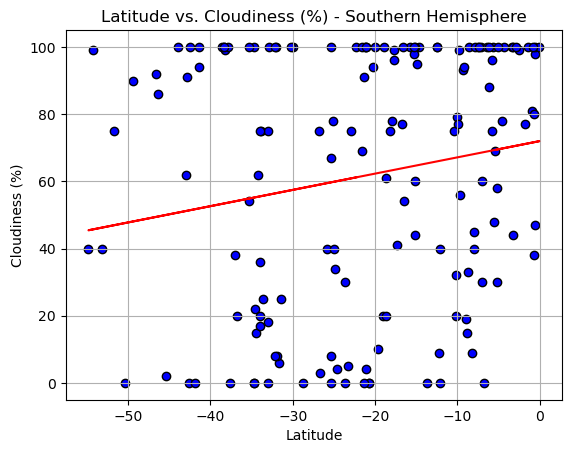

In [61]:
# Southern Hemisphere
plt.grid()
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.03x + 8.18
The r-value is: 0.09126345837542758


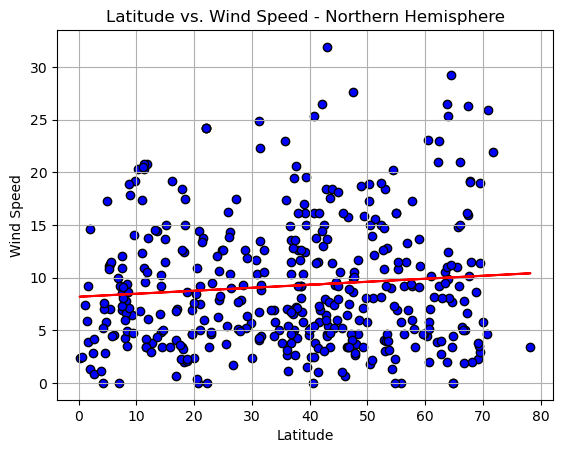

In [62]:
# Northern Hemisphere
plt.grid()
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWind Speed'
vbl = 'Wind Speed'
hemi = 'Northern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
# YOUR CODE HERE

Linear equation: y = -0.07x + 6.39
The r-value is: -0.17886499409483075


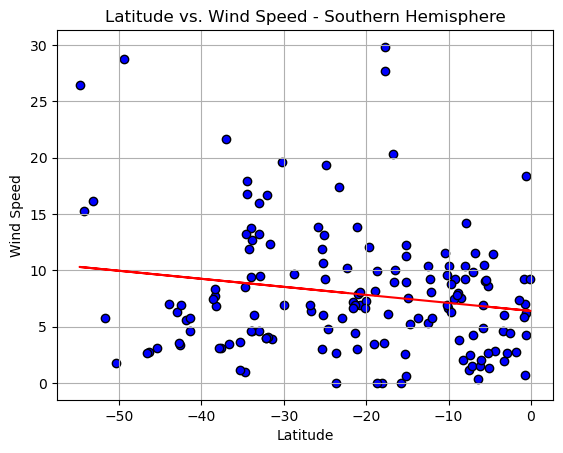

In [63]:
# Southern Hemisphere
plt.grid()
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k', linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWind Speed'
vbl = 'Wind Speed'
hemi = 'Southern Hemisphere'
linearRegression(x,y,name,vbl,hemi)
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE